In [152]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [153]:
# Update pyplot defaults
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

# CSV einlesen und preprocessing #

In [154]:
filename = "../datasets/survery_data_annonymized_230626.csv"
data = pd.read_csv(filename)
data.head()

Timestamp  Alter Geschlecht  \
0   2023/05/25 9:05:15 AM GMT+3     28   männlich   
1   2023/05/25 9:21:27 AM GMT+3     26   männlich   
2  2023/05/25 10:10:57 AM GMT+3     24   männlich   
3  2023/05/30 11:25:32 PM GMT+3     23   männlich   
4  2023/05/31 11:17:51 AM GMT+3     24   weiblich   

  Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene "Datenpunkt" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.  \
0                                      lalala-lololo                                                                                                                                                                       
1                                              hbstr                                                                                                                                                                       
2                                              Panda                                                                                                                                                                       
3                                  TomTom Navigation                                                                                                                                                                       
4                                            LcAbrgr                                                                                                                                                                       

  Welcher Funktion an der HSD fühlst du dich am meisten zugehörig?  \
0                                         Student*in                 
1                                         Student*in                 
2                                         Student*in                 
3                                         Student*in                 
4                                         Student*in                 

  Welchem Studiengang fühlst du dich am meisten zugehörig?  \
0                                                MMI         
1                                                MMI         
2                                                MMI         
3                                                MMI         
4                                                MMI         

   Als wie sportlich würdest du dich einschätzen?  \
0                                               4   
1                                               3   
2                                               2   
3                                               5   
4                                               3   

  Welche Sportarten interessieren dich am meisten (wähle maximal 5)?  \
0  Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...                   
1  Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...                   
2     Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern                   
3       Leichtathletik;Bouldern/Klettern;Wintersport                   
4                                  Bouldern/Klettern                   

  Was ist deine absolute Lieblingssportart?  \
0                                    Joggen   
1                                  Fußball    
2                                         -   
3                                 Trampolin   
4                                  Klettern   

   Welche Rolle spielt für dich gesunde Ernährung?   ...  \
0                                                 4  ...   
1                                                 4  ...   
2                                                 5  ...   
3                                                 2  ...   
4                                                 4  ...   

   Strebst du nach dem Studium auch weiterhin eine akademische Laufbahn an?  \
0                                                  1                          
1                                 

# Timestamp entfernen #

In [155]:
data.drop("Timestamp", axis=1, inplace=True)

## Einen Zeilenumbruch nach 50 Zeichen einfügen, um lange Titel besser darzustellen ##

In [156]:
import re

def insert_linebreaks(title):
    linebreak_limit = 50

    if len(title) < linebreak_limit:
        return title
    else:
        part_after_limit = title[linebreak_limit:]
        # replace first whitespace after limit with linebreak
        part_after_limit = re.sub(r"\s+", "\n", part_after_limit, 1)
        return title[:linebreak_limit] + part_after_limit

data.rename(columns=lambda title: insert_linebreaks(title), inplace=True)
data.head()

Alter Geschlecht  \
0     28   männlich   
1     26   männlich   
2     24   männlich   
3     23   männlich   
4     24   weiblich   

  Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene "Datenpunkt" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.  \
0                                      lalala-lololo                                                                                                                                                                        
1                                              hbstr                                                                                                                                                                        
2                                              Panda                                                                                                                                                                        
3                                  TomTom Navigation                                                                                                                                                                        
4                                            LcAbrgr                                                                                                                                                                        

  Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?  \
0                                         Student*in                  
1                                         Student*in                  
2                                         Student*in                  
3                                         Student*in                  
4                                         Student*in                  

  Welchem Studiengang fühlst du dich am meisten zugehörig?  \
0                                                MMI         
1                                                MMI         
2                                                MMI         
3                                                MMI         
4                                                MMI         

   Als wie sportlich würdest du dich einschätzen?  \
0                                               4   
1                                               3   
2                                               2   
3                                               5   
4                                               3   

  Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?  \
0  Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...                    
1  Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...                    
2     Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern                    
3       Leichtathletik;Bouldern/Klettern;Wintersport                    
4                                  Bouldern/Klettern                    

  Was ist deine absolute Lieblingssportart?  \
0                                    Joggen   
1                                  Fußball    
2                                         -   
3                                 Trampolin   
4                                  Klettern   

   Welche Rolle spielt für dich gesunde Ernährung?   \
0                                                 4   
1                                                 4   
2                                                 5   
3                                                 2   
4                                                 4   

   Wie gerne gehst du Essen oder Trinken?  ...  \
0                                       3  ...   
1                                       4  ...   
2                                       4  ...   
3                                       4  ...   
4                                       3  ...   

   Strebst du nach dem Studium auch weiterhin eine akademische\n

# Whitespace, Emojis und Co. entfernen #

In [157]:
# remove_emojis from https://stackoverflow.com/a/58356570
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_emojis_and_whitespace(data):
    return remove_emojis(data).strip()

# remove all emojis from the data
data = data.applymap(lambda x: remove_emojis_and_whitespace(x) if isinstance(x, str) else x)

data["Was ist dein Lieblingsessen? (nur eines angeben)"].value_counts()

Pizza                                       6
Burger                                      5
Döner                                       4
Lasagne                                     4
Pasta                                       3
Sushi                                       3
Pfannkuchen                                 3
Nudeln                                      2
Humus                                       1
Tortelini                                   1
Yaprak                                      1
Lachs mit Bratkartoffeln und Gurkensalat    1
Ramen                                       1
Vegane Lasagne                              1
Cordon bleu                                 1
Reispfanne mit viel Gemüse                  1
Gemüsepfanne mit Reis                       1
Carbonara                                   1
Ofenkartoffeln mit Gemüse                   1
Pommes                                      1
Nudeln mit Pilzen in Sahnesauce             1
Hamburger                         

## One Hot Encoding für "Welche Sportarten interessieren dich am meisten?" (Multiselect) ##

In [158]:
sports_column_name = "Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?"
prefix_sportarten = "sportarten_"

encoded_columns = data[sports_column_name].str.get_dummies(sep=";")
encoded_columns.columns = encoded_columns.columns.map(lambda x: prefix_sportarten + x)

data = data.join(encoded_columns)
data = data.drop(sports_column_name, axis=1)
data.head()

Alter Geschlecht  \
0     28   männlich   
1     26   männlich   
2     24   männlich   
3     23   männlich   
4     24   weiblich   

  Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene "Datenpunkt" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.  \
0                                      lalala-lololo                                                                                                                                                                        
1                                              hbstr                                                                                                                                                                        
2                                              Panda                                                                                                                                                                        
3                                  TomTom Navigation                                                                                                                                                                        
4                                            LcAbrgr                                                                                                                                                                        

  Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?  \
0                                         Student*in                  
1                                         Student*in                  
2                                         Student*in                  
3                                         Student*in                  
4                                         Student*in                  

  Welchem Studiengang fühlst du dich am meisten zugehörig?  \
0                                                MMI         
1                                                MMI         
2                                                MMI         
3                                                MMI         
4                                                MMI         

   Als wie sportlich würdest du dich einschätzen?  \
0                                               4   
1                                               3   
2                                               2   
3                                               5   
4                                               3   

  Was ist deine absolute Lieblingssportart?  \
0                                    Joggen   
1                                   Fußball   
2                                         -   
3                                 Trampolin   
4                                  Klettern   

   Welche Rolle spielt für dich gesunde Ernährung?   \
0                                                 4   
1                                                 4   
2                                                 5   
3                                                 2   
4                                                 4   

   Wie gerne gehst du Essen oder Trinken?  Wie gerne kochst du selbst?  ...  \
0                                       3                            4  ...   
1                                       4                            5  ...   
2                                       4                            4  ...   
3                                       4                            4  ...   
4                                       3                            2  ...   

   sportarten_Leichtathletik sportarten_Reiten  \
0                          0                 0   
1                          0                 0   
2                          0                 0   
3                          1                 0   
4                          0                 0   

   sportarten_Rennrad/Mounta

## Kürzere Label für die Spalten ##

In [159]:
short_labels = ["alter", "geschlecht", "pseudonym", "funktion", "studiengang", "sportlichkeit", "lieblingssportart",
          "ernaehrung", "essengehen", "kochen", "feiern", "lieblingsessen", "musik", "lieblingsmusiker", "lesen", "schauspiel",
          "filme", "malen", "museumsbesuche", "videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften",
          "freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig",
          "abenteuerlustig", "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren",
          "letzter_druecker", "neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld",]

short_labels = short_labels + list(encoded_columns.columns)
short_labels

['alter',
 'geschlecht',
 'pseudonym',
 'funktion',
 'studiengang',
 'sportlichkeit',
 'lieblingssportart',
 'ernaehrung',
 'essengehen',
 'kochen',
 'feiern',
 'lieblingsessen',
 'musik',
 'lieblingsmusiker',
 'lesen',
 'schauspiel',
 'filme',
 'malen',
 'museumsbesuche',
 'videospiele',
 'social_media',
 'technologie',
 'astronomie',
 'naturwissenschaften',
 'freiwilligenarbeit',
 'soziales',
 'introvertiert',
 'fomo',
 'spontan',
 'verwirrt',
 'gluecklich',
 'geduldig',
 'streitlustig',
 'abenteuerlustig',
 'studienzweifel',
 'studium_zufriedenheit',
 'akademische_laufbahn',
 'lerngruppe',
 'prokrastinieren',
 'letzter_druecker',
 'neue_lebensmittel',
 'natur',
 'reisen',
 'handwerk',
 'sprachnachrichten',
 'geld',
 'sportarten_Basketball',
 'sportarten_Bouldern/Klettern',
 'sportarten_Football',
 'sportarten_Fußball',
 'sportarten_Handball',
 'sportarten_Hockey',
 'sportarten_Kampfsport',
 'sportarten_Leichtathletik',
 'sportarten_Reiten',
 'sportarten_Rennrad/Mountainbike',
 'spor

In [160]:
# Create a dictionary with short labels as keys and full questions as values
short_labels_and_full_questions = dict(zip(short_labels, data.columns))

# Convert to series
columns = pd.Series(short_labels_and_full_questions)

%store columns

data[columns.museumsbesuche].head()

Stored 'columns' (Series)


0    2
1    4
2    5
3    3
4    2
Name: Wie gerne besuchst du Museen?, dtype: int64

## Beobachtungen zu den Daten ##

--> "Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in? (nur eine/n angeben)" hat 7 fehlende Einträge \
--> "Was ist dein Lieblingsessen? (nur eines angeben)" hat 4 fehlende Einträge

In [161]:
data.describe()

Alter  Als wie sportlich würdest du dich einschätzen?  \
count  62.000000                                       62.000000   
mean   25.532258                                        3.290323   
std     4.482087                                        0.981586   
min    18.000000                                        1.000000   
25%    23.000000                                        3.000000   
50%    25.000000                                        3.000000   
75%    28.000000                                        4.000000   
max    42.000000                                        5.000000   

       Welche Rolle spielt für dich gesunde Ernährung?   \
count                                         62.000000   
mean                                           3.548387   
std                                            0.823376   
min                                            1.000000   
25%                                            3.000000   
50%                                            4.000000   
75%                                            4.000000   
max                                            5.000000   

       Wie gerne gehst du Essen oder Trinken?  Wie gerne kochst du selbst?  \
count                               62.000000                    62.000000   
mean                                 3.854839                     3.822581   
std                                  0.989233                     0.983873   
min                                  1.000000                     2.000000   
25%                                  3.000000                     3.000000   
50%                                  4.000000                     4.000000   
75%                                  5.000000                     5.000000   
max                                  5.000000                     5.000000   

       Wie gerne gehst du feiern?  Wie sehr interessierst du dich für Musik?  \
count                   62.000000                                  62.000000   
mean                     2.822581                                   4.000000   
std                      1.166811                                   0.940875   
min                      1.000000                                   2.000000   
25%                      2.000000                                   3.000000   
50%                      3.000000                                   4.000000   
75%                      4.000000                                   5.000000   
max                      5.000000                                   5.000000   

       Wie gerne liest Du?  \
count            62.000000   
mean              3.112903   
std               1.229485   
min               1.000000   
25%               2.000000   
50%               3.000000   
75%               4.000000   
max               5.000000   

       Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?  \
count                                          62.000000                                           
mean                                            2.629032                                           
std                                             1.190590                                           
min                                             1.000000                                           
25%                                             2.000000                                           
50%                                             3.000000                                           
75%                                             4.000000                                           
max                                             5.000000                                           

       Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?  ...  \
count                                          62.000000                  ...   
mean                                            3.741935                  ...   
std                        

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 63 columns):
 #   Column                                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                  --------------  ----- 
 0   Alter                                                                                                                                                                                                                   62 non-null     int64 
 1   Geschlecht                                                                                                                                                      

In [174]:
df_columns_have_nan_values = pd.DataFrame(zip(short_labels, data.isna().any().values), columns=["short_label", "has_nan"])
columns_with_nan_values = df_columns_have_nan_values[df_columns_have_nan_values.has_nan == True]
columns_with_nan_values

short_label  has_nan
11    lieblingsessen     True
13  lieblingsmusiker     True

In [172]:
columns_with_nan_values_original = [columns[x] for x in list(columns_with_nan_values["short_label"])]
data[columns_with_nan_values_original].isna().sum()

Was ist dein Lieblingsessen? (nur eines angeben)                                       4
Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)    7
dtype: int64

## TODO: Hier schon NaN-Handling? ##

## Daten visualisieren ##

### Demographische Daten ###

<Axes: title={'center': 'Welchem Studiengang fühlst du dich am meisten zugehörig?'}>

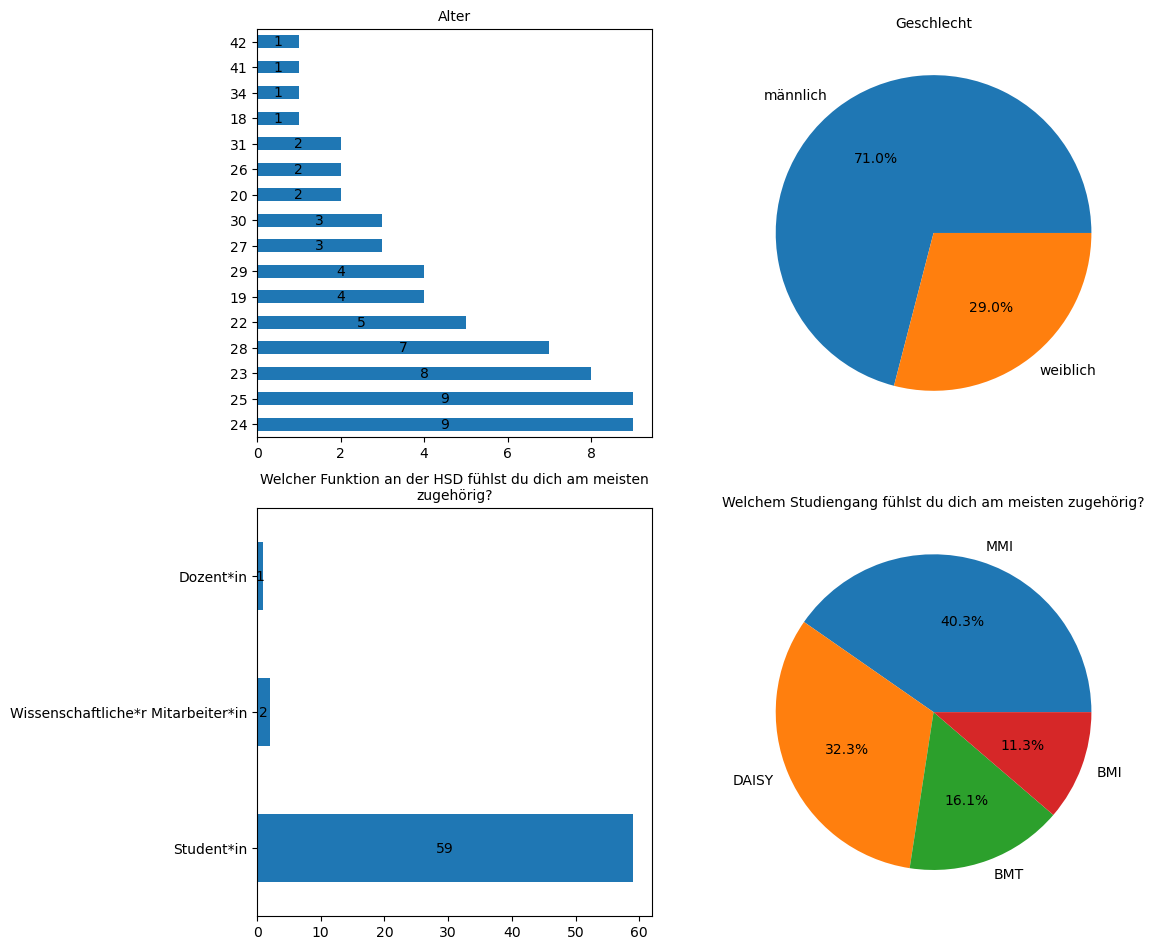

In [127]:
# Plot a chart with 4 subplots showing the distribution of the demographic data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=3)

alter = data.value_counts(columns.alter).plot.barh(ax=axes[0, 0], title=columns.alter, ylabel="")
alter.bar_label(alter.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.geschlecht).plot.pie(ax=axes[0, 1], title=columns.geschlecht, ylabel="", autopct='%1.1f%%')

funktion = data.value_counts(columns.funktion).plot.barh(ax=axes[1, 0], title=columns.funktion, ylabel="")
funktion.bar_label(funktion.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.studiengang).plot.pie(ax=axes[1, 1], title=columns.studiengang, ylabel="", autopct='%1.1f%%')

### Skala von Fragen mit Ordinalskala (1-5 Fragen) ###

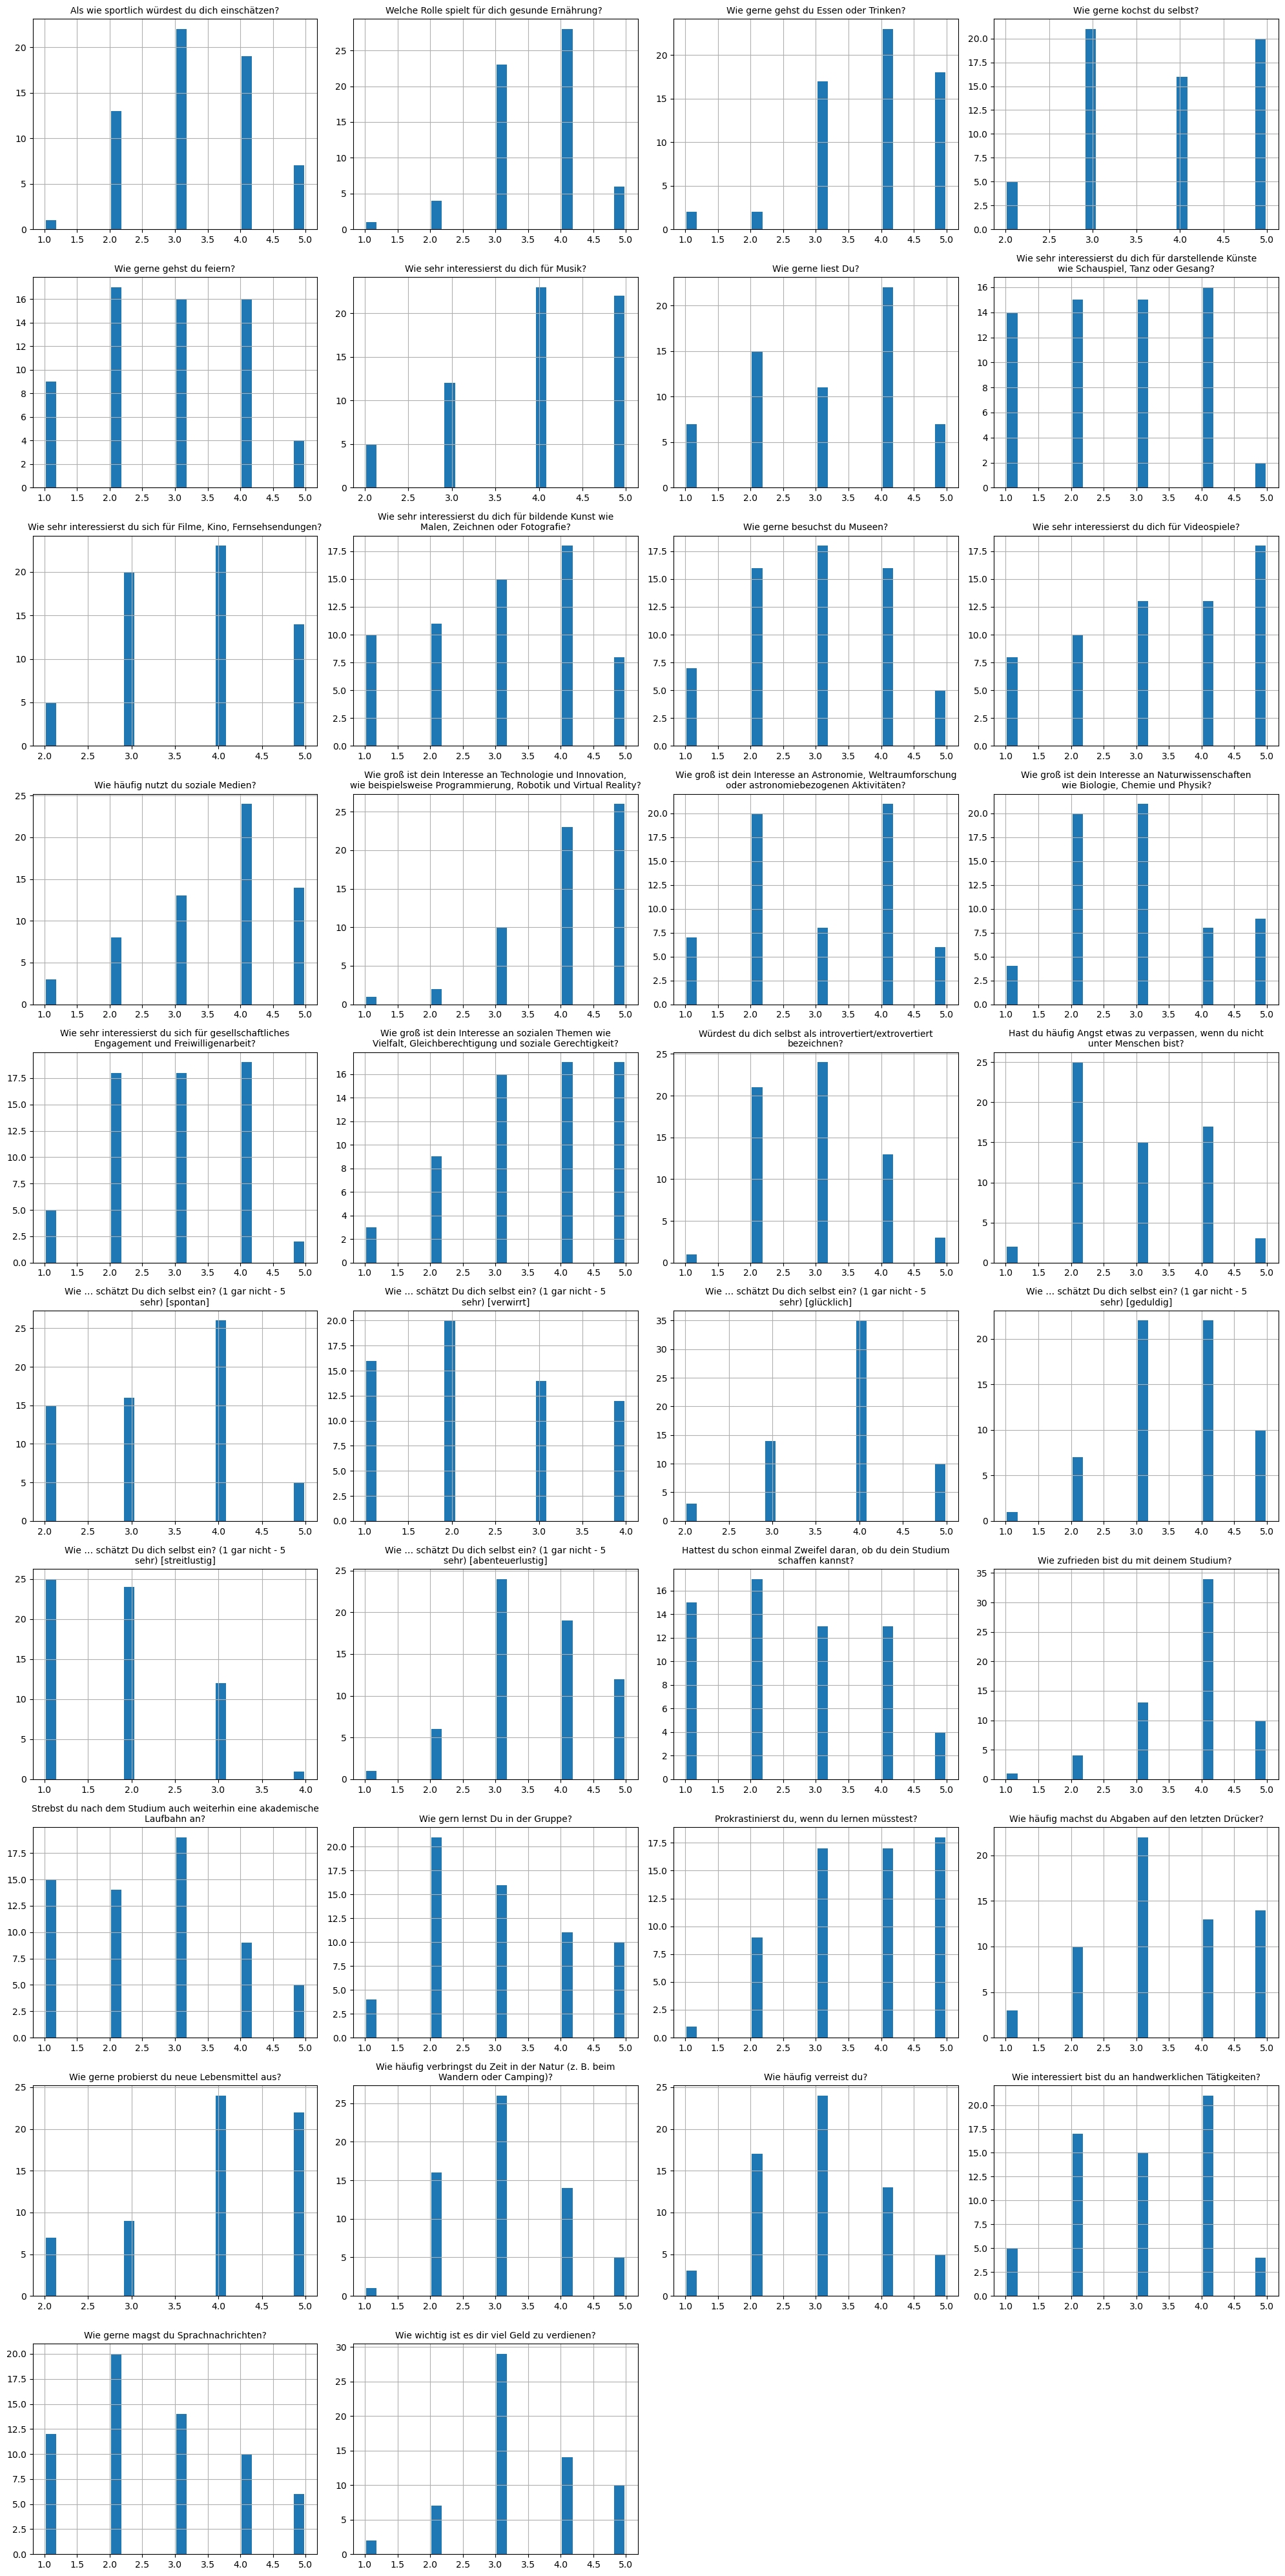

In [128]:
# Plot all numeric columns (including the ordinal data (1-5)) but excluding one-hot-encoded columns and age in a histogram
columns_to_drop = encoded_columns.columns.to_list() + [columns.alter]
data_without_one_hot_encoded_columns_and_age = data.drop(columns_to_drop, axis=1)

data_without_one_hot_encoded_columns_and_age.hist(figsize=(20,40), rwidth=0.8, bins=20, layout=(10, 4))
plt.tight_layout()

### Kategorische Daten ###

In [129]:
non_numeric_colums = data.select_dtypes(exclude=["number"])
non_numeric_colums.describe()

Geschlecht  \
count          62   
unique          2   
top      männlich   
freq           44   

       Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene "Datenpunkt" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.  \
count                                                  62                                                                                                                                                                        
unique                                                 62                                                                                                                                                                        
top                                         lalala-lololo                                                                                                                                                                        
freq                                                    1                                                                                                                                                                        

       Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?  \
count                                                  62                  
unique                                                  3                  
top                                            Student*in                  
freq                                                   59                  

       Welchem Studiengang fühlst du dich am meisten zugehörig?  \
count                                                  62         
unique                                                  4         
top                                                   MMI         
freq                                                   25         

       Was ist deine absolute Lieblingssportart?  \
count                                         62   
unique                                        41   
top                                      Fußball   
freq                                          10   

       Was ist dein Lieblingsessen? (nur eines angeben)  \
count                                                58   
unique                                               36   
top                                               Pizza   
freq                                                  6   

       Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)  
count                                                  55                                   
unique                                                 51                                   
top                                        Antilopen Gang                                   
freq                                                    2

In [130]:
non_numeric_colums = non_numeric_colums.drop([columns.pseudonym, columns.geschlecht, columns.studiengang, columns.funktion], axis=1)
non_numeric_colums.head()

Was ist deine absolute Lieblingssportart?  \
0                                    Joggen   
1                                   Fußball   
2                                         -   
3                                 Trampolin   
4                                  Klettern   

  Was ist dein Lieblingsessen? (nur eines angeben)  \
0                                   Vegane Lasagne   
1                                       Butterbrot   
2                                          Lasagne   
3                                           Burger   
4                                      Dampfnudeln   

  Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)  
0                                          Kraftklub                                   
1                              Red hot Chili peppers                                   
2                                           The 1975                                   
3                                                NaN                                   
4                                                NaN

<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

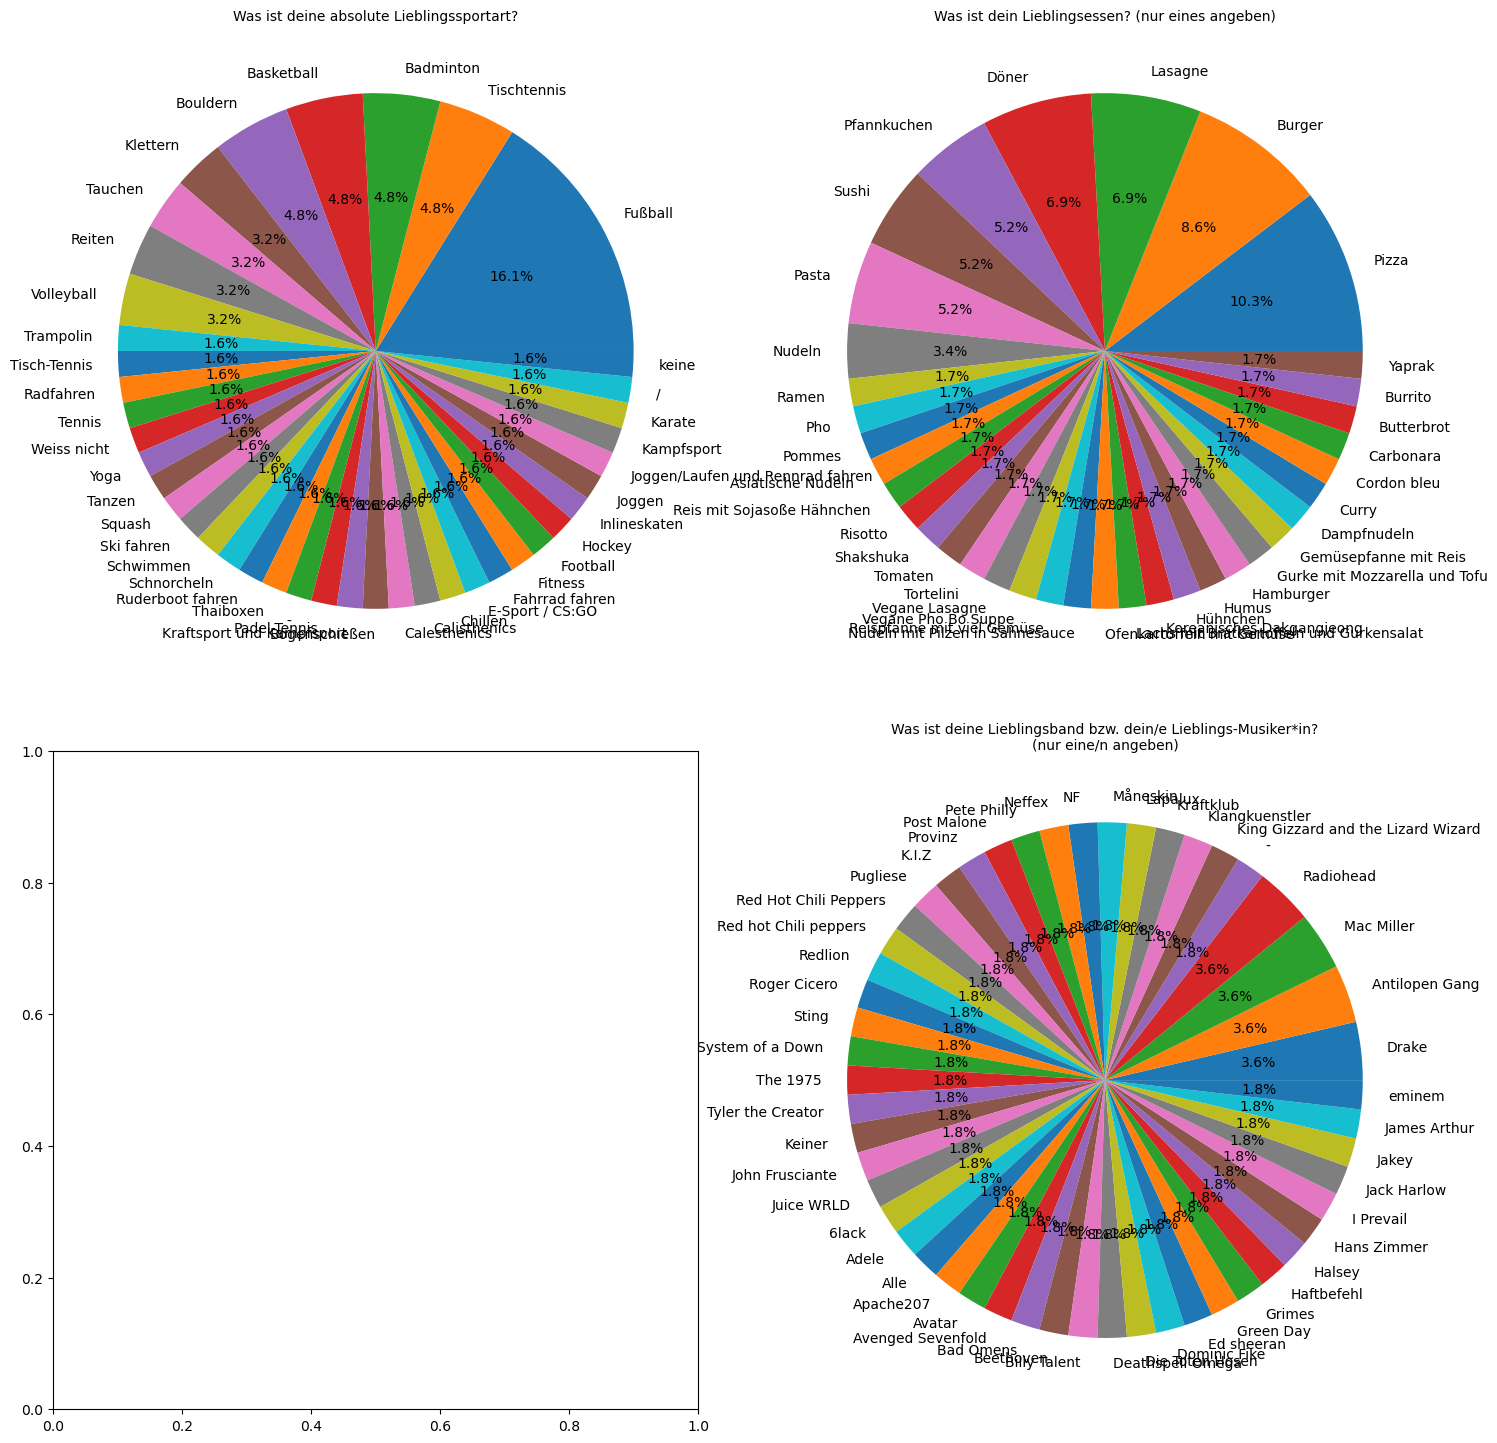

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

## Erkenntnisse ##

--> Fußball, Basketball und Calesthenics treten bei den Lieblingssportarten 2x als unterschiedliche Werte aus (z. B. aufgrund von der Schreibweise) (DONE: Bereits zusammengeführt) \

--> Jemand hat bei Lieblingssportart "Weiß nicht" und jemand "-" geantwortet \ (DONE)
--> Außerdem hat jemand "Chillen" geantwortet \ (DONE)
--> Bei Lieblingsmusiker/-band hat auch jemand mit "-" geantwortet (DONE)

--> Tauchen und Schnorcheln könnte man ggf. auch zusammenführen? \
--> Was machen wir mit den Leuten, die zwei oder mehr Sportarten eingegeben haben? \
--> Wollen verschiedene Kampfsportarten zusammenführen?

In [132]:
# combine all invalid values into one value
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace(["/", "-", "Weiss nicht", "keine", "Chillen"], "Keine Lieblingssportart")
data[columns.lieblingssportart].fillna("Keine Lieblingssportart", inplace=True)

In [133]:
# only use the first answer if someone selected multiple sports
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.split("/", expand=True)[0]
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.split("und", expand=True)[0]
data[columns.lieblingssportart].value_counts()

Fußball                    10
Keine Lieblingssportart     5
Badminton                   3
Bouldern                    3
Basketball                  3
Tischtennis                 3
Joggen                      2
Volleyball                  2
Tauchen                     2
Reiten                      2
Klettern                    2
Hockey                      1
Karate                      1
Squash                      1
Yoga                        1
Kraftsport                  1
Inlineskaten                1
Ruderboot fahren            1
Tanzen                      1
Fahrrad fahren              1
Padel-Tennis                1
Bogenschießen               1
Radfahren                   1
E-Sport                     1
Fitness                     1
Schwimmen                   1
Tisch-Tennis                1
Calesthenics                1
Calisthenics                1
Thaiboxen                   1
Football                    1
Kampfsport                  1
Tennis                      1
Schnorchel

In [134]:
# combine "Fahrrad fahren" and "Radfahren" into one value
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Fahrrad fahren", "Radfahren")

In [135]:
# combine "Calesthenics" and "Calisthenics" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Calesthenics", "Calisthenics")

In [136]:
# combine "Tischtennis" and "Tisch-Tennis" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Tisch-Tennis", "Tischtennis")

In [137]:
data[columns.lieblingsessen].sort_values().unique()

array(['Asiatische Nudeln', 'Burger', 'Burrito', 'Butterbrot',
       'Carbonara', 'Cordon bleu', 'Curry', 'Dampfnudeln', 'Döner',
       'Gemüsepfanne mit Reis', 'Gurke mit Mozzarella und Tofu',
       'Hamburger', 'Humus', 'Hühnchen', 'Koreanisches Dakgangjeong',
       'Lachs mit Bratkartoffeln und Gurkensalat', 'Lasagne', 'Nudeln',
       'Nudeln mit Pilzen in Sahnesauce', 'Ofenkartoffeln mit Gemüse',
       'Pasta', 'Pfannkuchen', 'Pho', 'Pizza', 'Pommes', 'Ramen',
       'Reis mit Sojasoße Hähnchen', 'Reispfanne mit viel Gemüse',
       'Risotto', 'Shakshuka', 'Sushi', 'Tomaten', 'Tortelini',
       'Vegane Lasagne', 'Vegane Pho Bo Suppe', 'Yaprak', nan],
      dtype=object)

In [138]:
# combine all invalid values into one value
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace(["/", "-", "Weiss nicht", "kein", "keins"], "Kein Lieblingsessen")
data[columns.lieblingsessen].fillna("Kein Lieblingsessen", inplace=True)

In [139]:
# combine "Hamburger" and "Burger" into one category
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace("Hamburger", "Burger")

In [140]:
# combine "Pasta" and "Nudeln" into one category
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace("Nudeln", "Pasta")

In [141]:
data[columns.lieblingsmusiker].sort_values().unique()

array(['-', '6lack', 'Adele', 'Alle', 'Antilopen Gang', 'Apache207',
       'Avatar', 'Avenged Sevenfold', 'Bad Omens', 'Beethoven',
       'Billy Talent', 'Deathspell Omega', 'Die Toten Hosen',
       'Dominic Fike', 'Drake', 'Ed sheeran', 'Green Day', 'Grimes',
       'Haftbefehl', 'Halsey', 'Hans Zimmer', 'I Prevail', 'Jack Harlow',
       'Jakey', 'James Arthur', 'John Frusciante', 'Juice WRLD', 'K.I.Z',
       'Keiner', 'King Gizzard and the Lizard Wizard', 'Klangkuenstler',
       'Kraftklub', 'Lapalux', 'Mac Miller', 'Måneskin', 'NF', 'Neffex',
       'Pete Philly', 'Post Malone', 'Provinz', 'Pugliese', 'Radiohead',
       'Red Hot Chili Peppers', 'Red hot Chili peppers', 'Redlion',
       'Roger Cicero', 'Sting', 'System of a Down', 'The 1975',
       'Tyler the Creator', 'eminem', nan], dtype=object)

In [142]:
# combine all invalid values into one value
data[columns.lieblingsmusiker] = data[columns.lieblingsmusiker].replace(["/", "-", "Alle", "Keiner", "keins"], "Kein Lieblingsmusiker")
data[columns.lieblingsmusiker].fillna("Kein Lieblingsmusiker", inplace=True)

In [143]:
# combine "Red Hot Chili Peppers" and "Red hot Chili peppers" into one category
data[columns.lieblingsmusiker] = data[columns.lieblingsmusiker].replace("Red hot Chili peppers", "Red Hot Chili Peppers")

<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

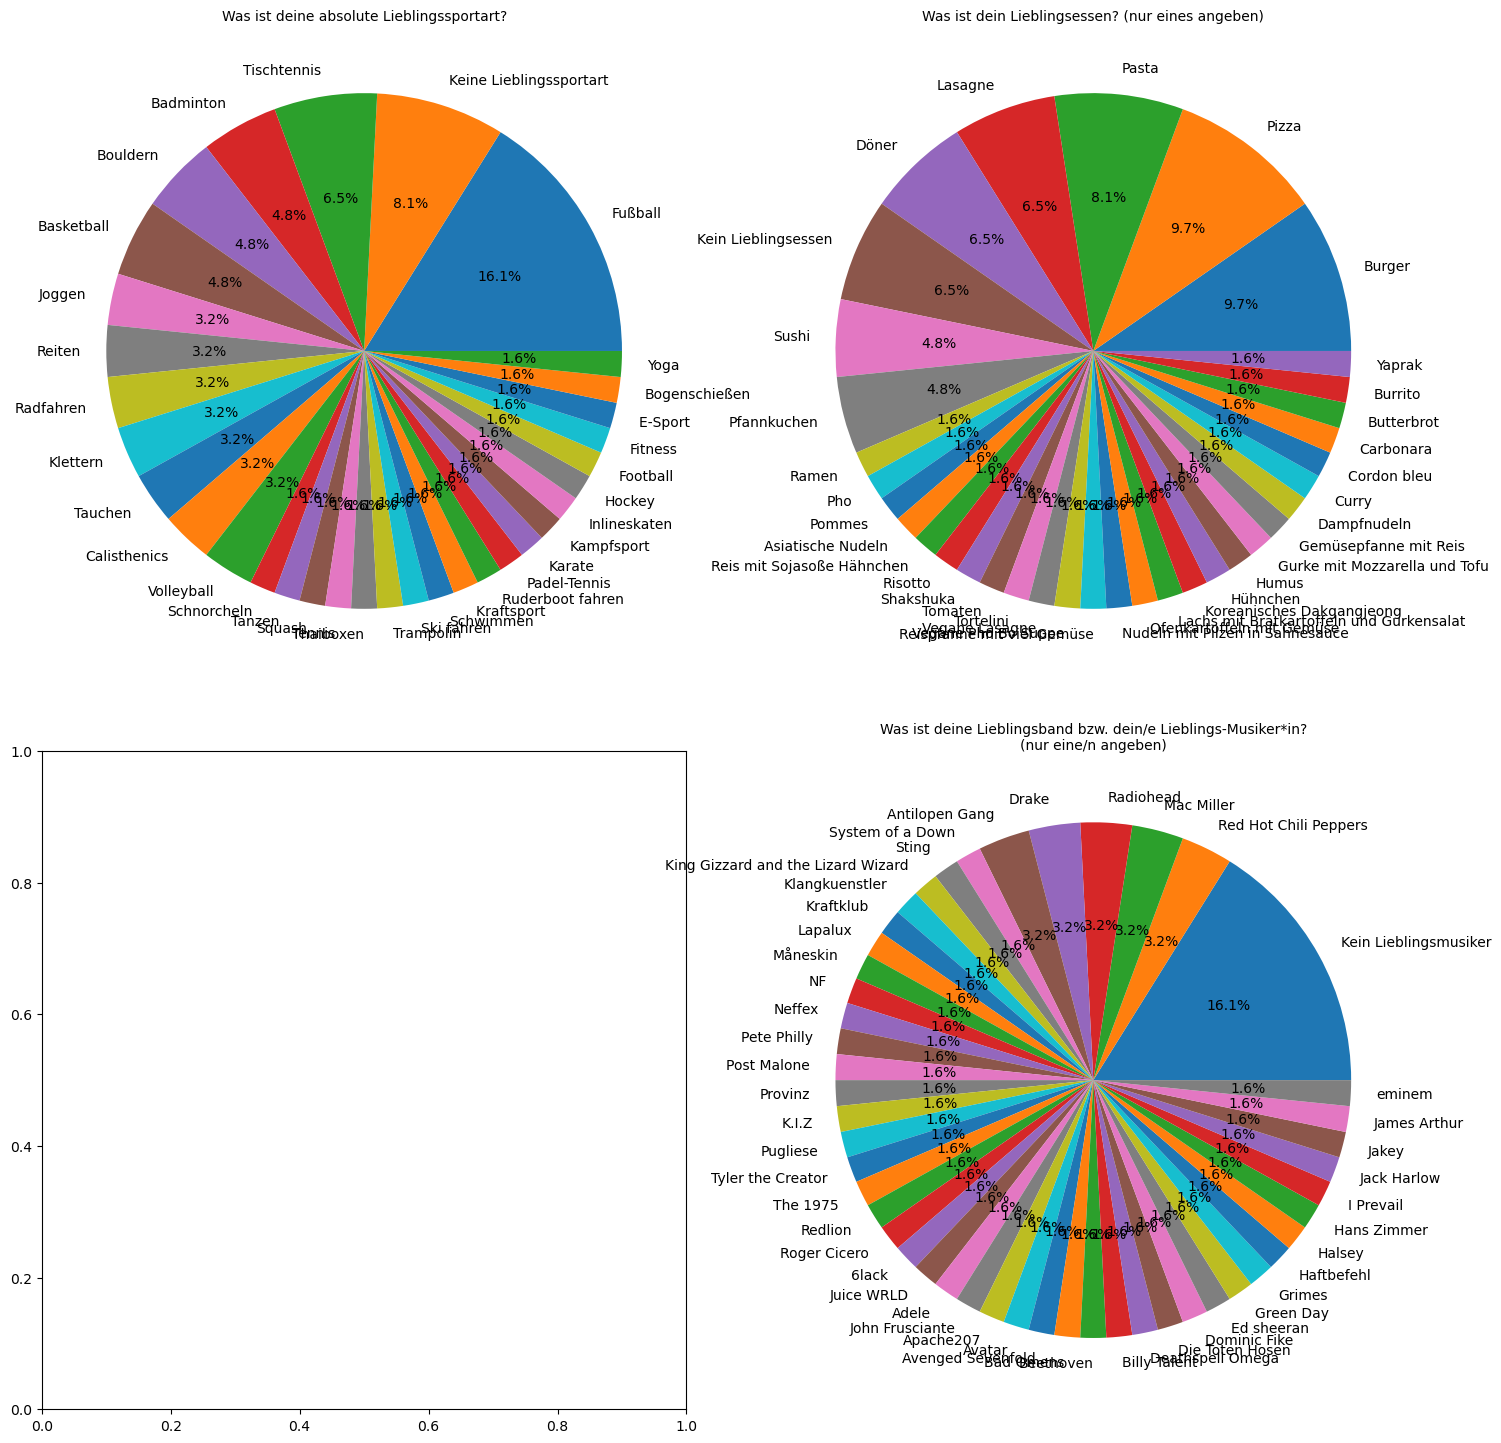

In [144]:
# plot again
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

In [145]:
# write the cleaned data to a new csv file
data.to_csv("../datasets/data_cleaned.csv", index=False)

%store data

Stored 'data' (DataFrame)


# TODO: Hier noch "Lieblingssportart", "Lieblingsessen" und "Lieblingsmusiker/-band" encoden #

--> Wahrscheinlich am sinnvollsten mit One Hot Encoding, weil es ja nur eine Nominalskala und keine Ordinalskala ist (also nicht geordnet --> Label Encoding würde eine nicht vorhandene Rangordnung reinbringen, die wir vermeiden wollen)

--> Sollten wir machen, damit z. B. die Korrelationsanalyse auch diese Features mit einbezieht

In [146]:
columns_to_encode = ["lieblingssportart", "lieblingsessen", "lieblingsmusiker"]
data_encoded = pd.get_dummies(data, columns=[columns.lieblingssportart, columns.lieblingsessen, columns.lieblingsmusiker], prefix=columns_to_encode)

# add new column names to short access dictionary
new_columns = set(data_encoded.columns) - set(data.columns)
short_labels_encoded = short_labels + list(new_columns)
for column in columns_to_encode:
    short_labels_encoded.remove(column)
    
# Create a dictionary with short labels as keys and full questions as values
short_labels_and_full_questions_encoded = dict(zip(short_labels_encoded, data_encoded.columns))

columns_encoded = pd.Series(short_labels_and_full_questions_encoded)
columns_encoded

%store columns_encoded

Stored 'columns_encoded' (Series)


In [147]:
# write the cleaned data to a new csv file
data_encoded.to_csv("../datasets/data_cleaned_encoded.csv", index=False)

%store data_encoded

Stored 'data_encoded' (DataFrame)


### Sportarten (jeweils die Anzahl der Menschen, die diese im Multiselect ausgewählt haben (0) oder nicht (1)) ###

[Text(0, 0, '49'), Text(0, 0, '13')]

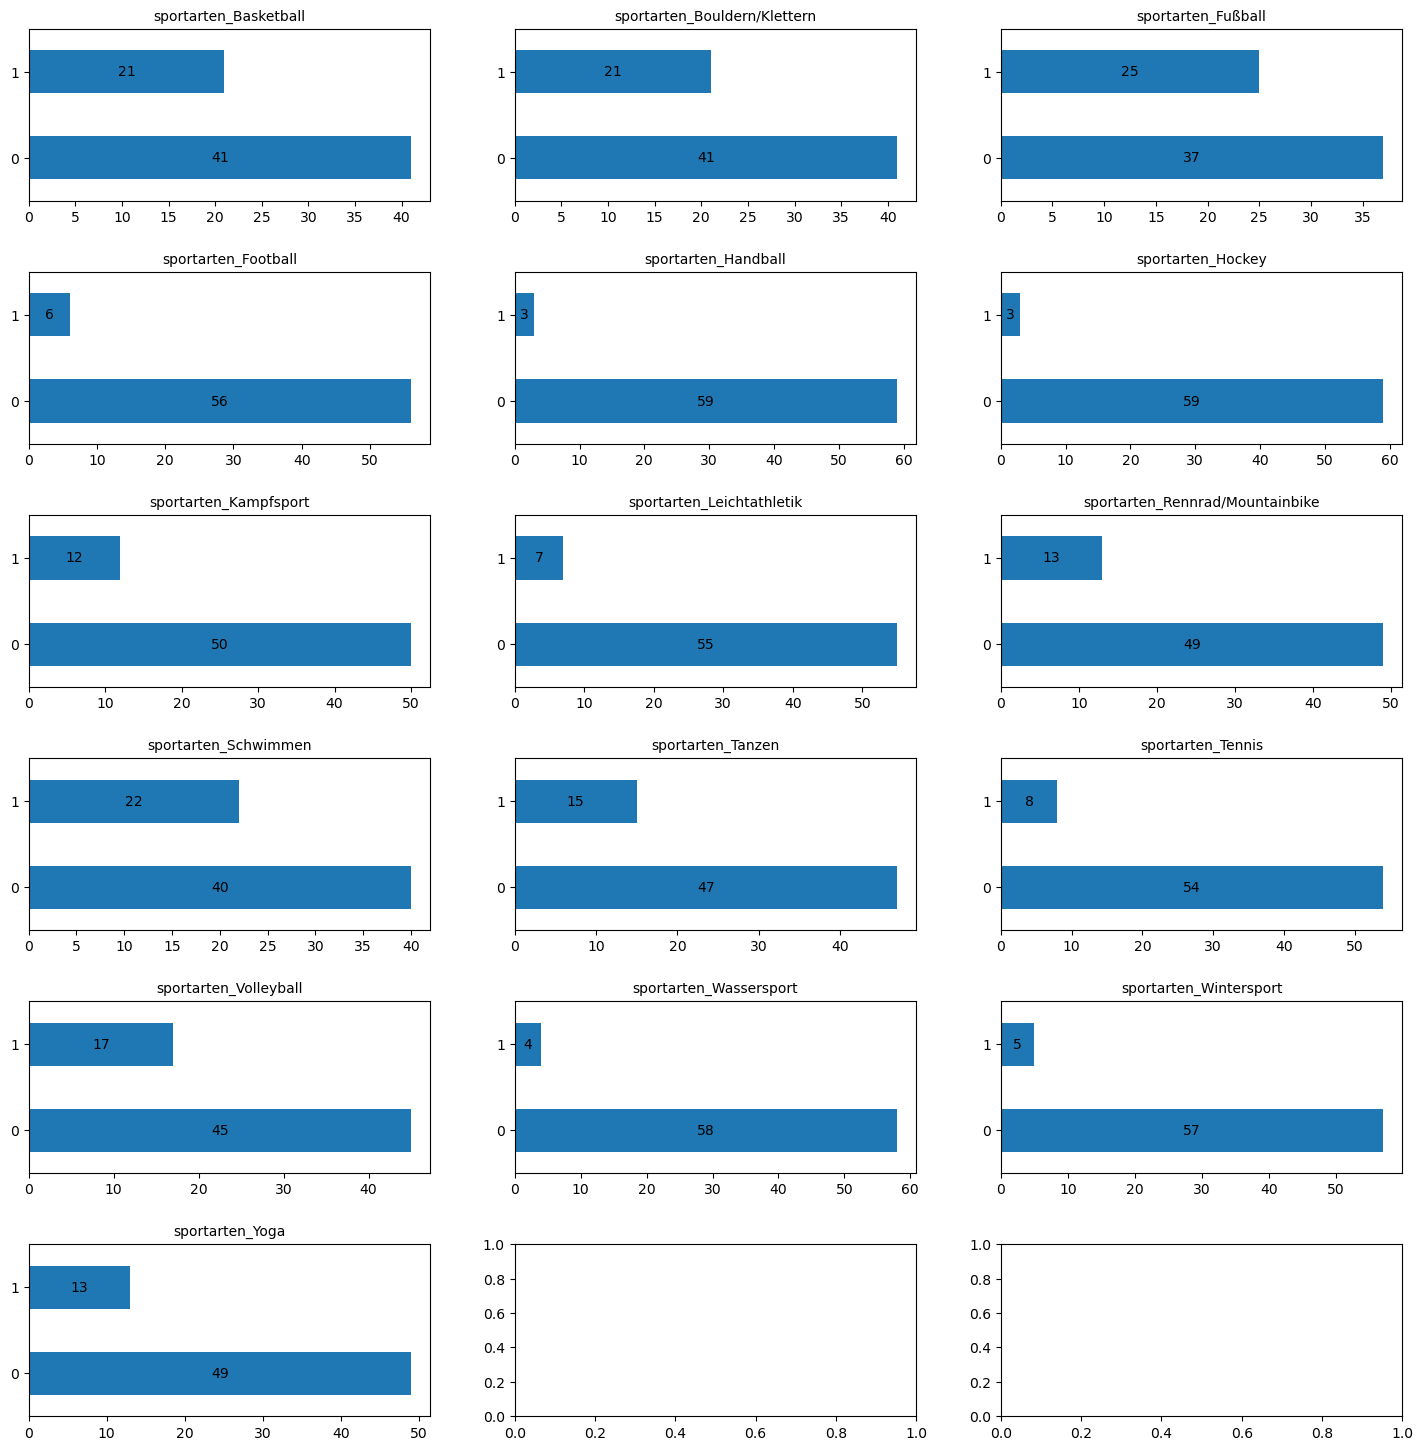

In [148]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
fig.tight_layout(pad=3)

basketball = data.value_counts(columns.sportarten_Basketball).plot.barh(ax=axes[0, 0], title=columns.sportarten_Basketball, ylabel="")
basketball.bar_label(basketball.containers[0], fmt='%.0f', label_type='center')

bouldern_klettern = data.value_counts(columns["sportarten_Bouldern/Klettern"]).plot.barh(ax=axes[0, 1], title=columns["sportarten_Bouldern/Klettern"], ylabel="")
bouldern_klettern.bar_label(bouldern_klettern.containers[0], fmt='%.0f', label_type='center')

fussball = data.value_counts(columns.sportarten_Fußball).plot.barh(ax=axes[0, 2], title=columns.sportarten_Fußball, ylabel="")
fussball.bar_label(fussball.containers[0], fmt='%.0f', label_type='center')

football = data.value_counts(columns.sportarten_Football).plot.barh(ax=axes[1, 0], title=columns.sportarten_Football, ylabel="")
football.bar_label(football.containers[0], fmt='%.0f', label_type='center')

handball = data.value_counts(columns.sportarten_Handball).plot.barh(ax=axes[1, 1], title=columns.sportarten_Handball, ylabel="")
handball.bar_label(handball.containers[0], fmt='%.0f', label_type='center')

hockey = data.value_counts(columns.sportarten_Hockey).plot.barh(ax=axes[1, 2], title=columns.sportarten_Hockey, ylabel="")
hockey.bar_label(hockey.containers[0], fmt='%.0f', label_type='center')

kampfsport = data.value_counts(columns.sportarten_Kampfsport).plot.barh(ax=axes[2, 0], title=columns.sportarten_Kampfsport, ylabel="")
kampfsport.bar_label(kampfsport.containers[0], fmt='%.0f', label_type='center')

leichtathletik = data.value_counts(columns.sportarten_Leichtathletik).plot.barh(ax=axes[2, 1], title=columns.sportarten_Leichtathletik, ylabel="")
leichtathletik.bar_label(leichtathletik.containers[0], fmt='%.0f', label_type='center')

rennrad_mountainbike = data.value_counts(columns["sportarten_Rennrad/Mountainbike"]).plot.barh(ax=axes[2, 2], title=columns["sportarten_Rennrad/Mountainbike"], ylabel="")
rennrad_mountainbike.bar_label(rennrad_mountainbike.containers[0], fmt='%.0f', label_type='center')

schwimmen = data.value_counts(columns.sportarten_Schwimmen).plot.barh(ax=axes[3, 0], title=columns.sportarten_Schwimmen, ylabel="")
schwimmen.bar_label(schwimmen.containers[0], fmt='%.0f', label_type='center')

tanzen = data.value_counts(columns.sportarten_Tanzen).plot.barh(ax=axes[3, 1], title=columns.sportarten_Tanzen, ylabel="")
tanzen.bar_label(tanzen.containers[0], fmt='%.0f', label_type='center')

tennis = data.value_counts(columns.sportarten_Tennis).plot.barh(ax=axes[3, 2], title=columns.sportarten_Tennis, ylabel="")
tennis.bar_label(tennis.containers[0], fmt='%.0f', label_type='center')

volleyball = data.value_counts(columns.sportarten_Volleyball).plot.barh(ax=axes[4, 0], title=columns.sportarten_Volleyball, ylabel="")
volleyball.bar_label(volleyball.containers[0], fmt='%.0f', label_type='center')

wassersport = data.value_counts(columns.sportarten_Wassersport).plot.barh(ax=axes[4, 1], title=columns.sportarten_Wassersport, ylabel="")
wassersport.bar_label(wassersport.containers[0], fmt='%.0f', label_type='center')

wintersport = data.value_counts(columns.sportarten_Wintersport).plot.barh(ax=axes[4, 2], title=columns.sportarten_Wintersport, ylabel="")
wintersport.bar_label(wintersport.containers[0], fmt='%.0f', label_type='center')

yoga = data.value_counts(columns.sportarten_Yoga).plot.barh(ax=axes[5, 0], title=columns.sportarten_Yoga, ylabel="")
yoga.bar_label(yoga.containers[0], fmt='%.0f', label_type='center')

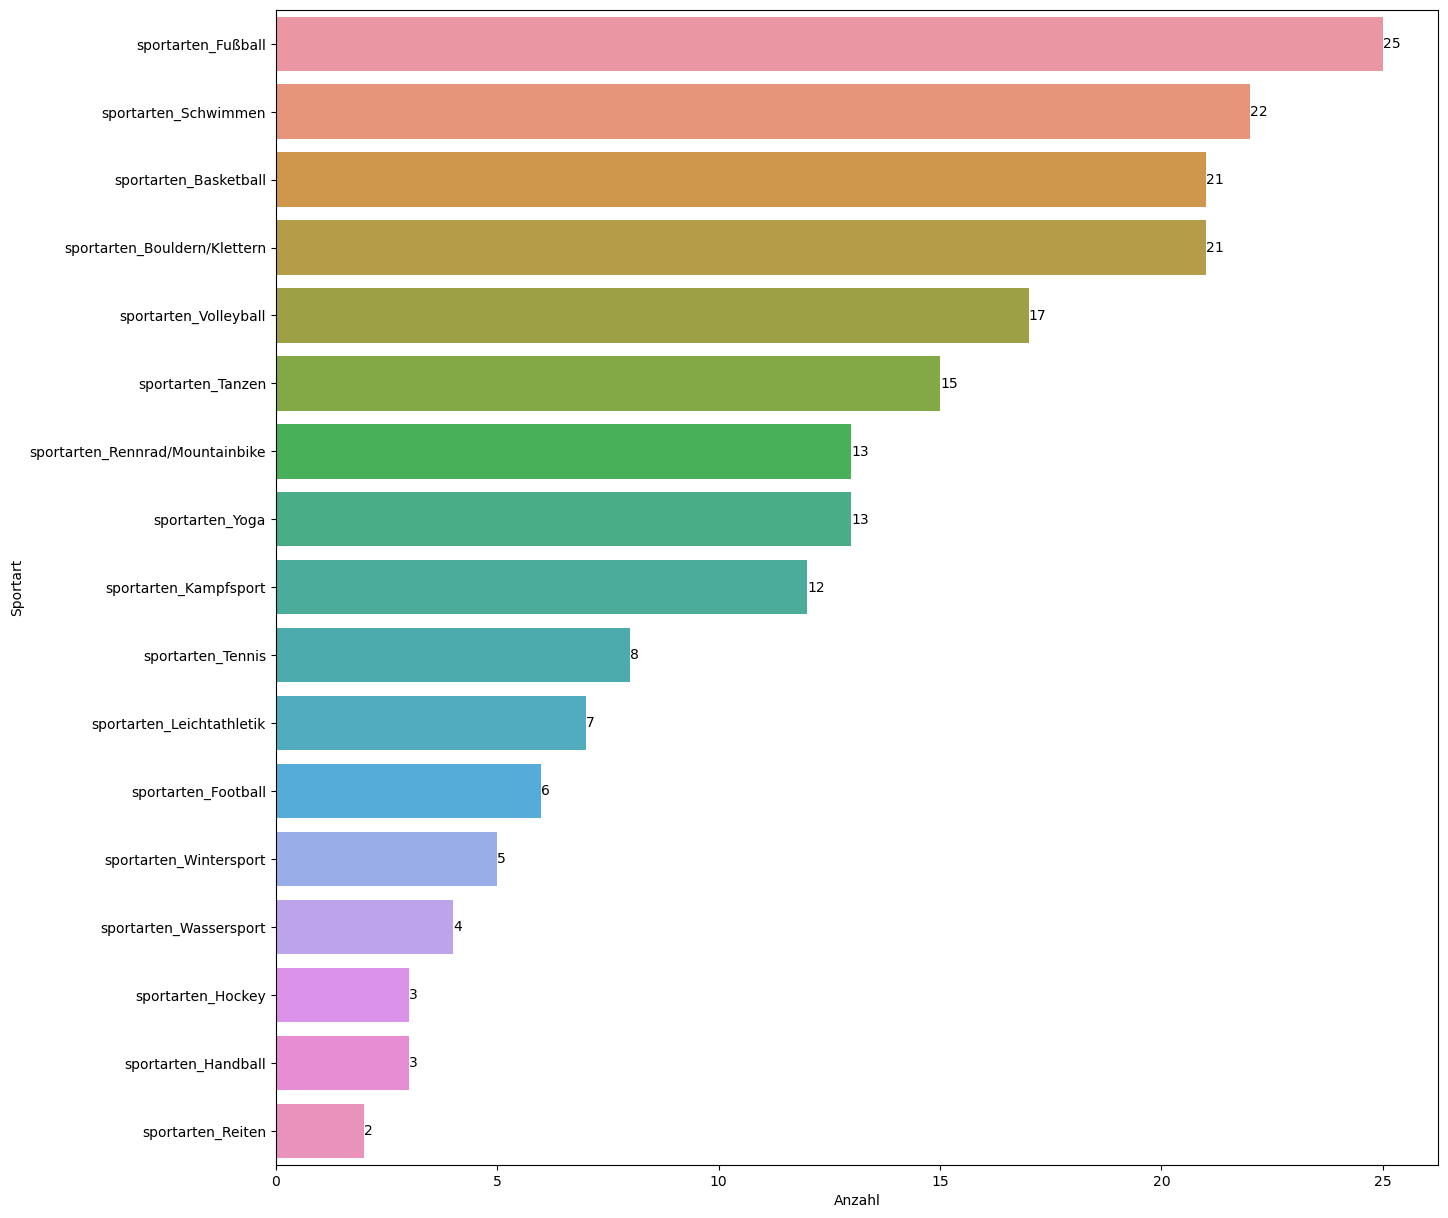

In [129]:
# Get all column names that are related to "Sportarten"
columns_sportarten = pd.Series(columns[columns.str.startswith('sportarten_')].index)

# Create new DataFrame that stores the amount of votes for each "Sportart"
df_filtered_sportarten= pd.DataFrame(zip(columns_sportarten, data[columns_sportarten].sum()), columns=["Sportart", "Anzahl"])
df_filtered_sportarten = df_filtered_sportarten.sort_values(by="Anzahl", ascending=False)

ax = sb.barplot(x='Anzahl', y='Sportart', data=df_filtered_sportarten)

for i in ax.containers:
    ax.bar_label(i,)

## Korrelationen untersuchen ##

<Axes: >

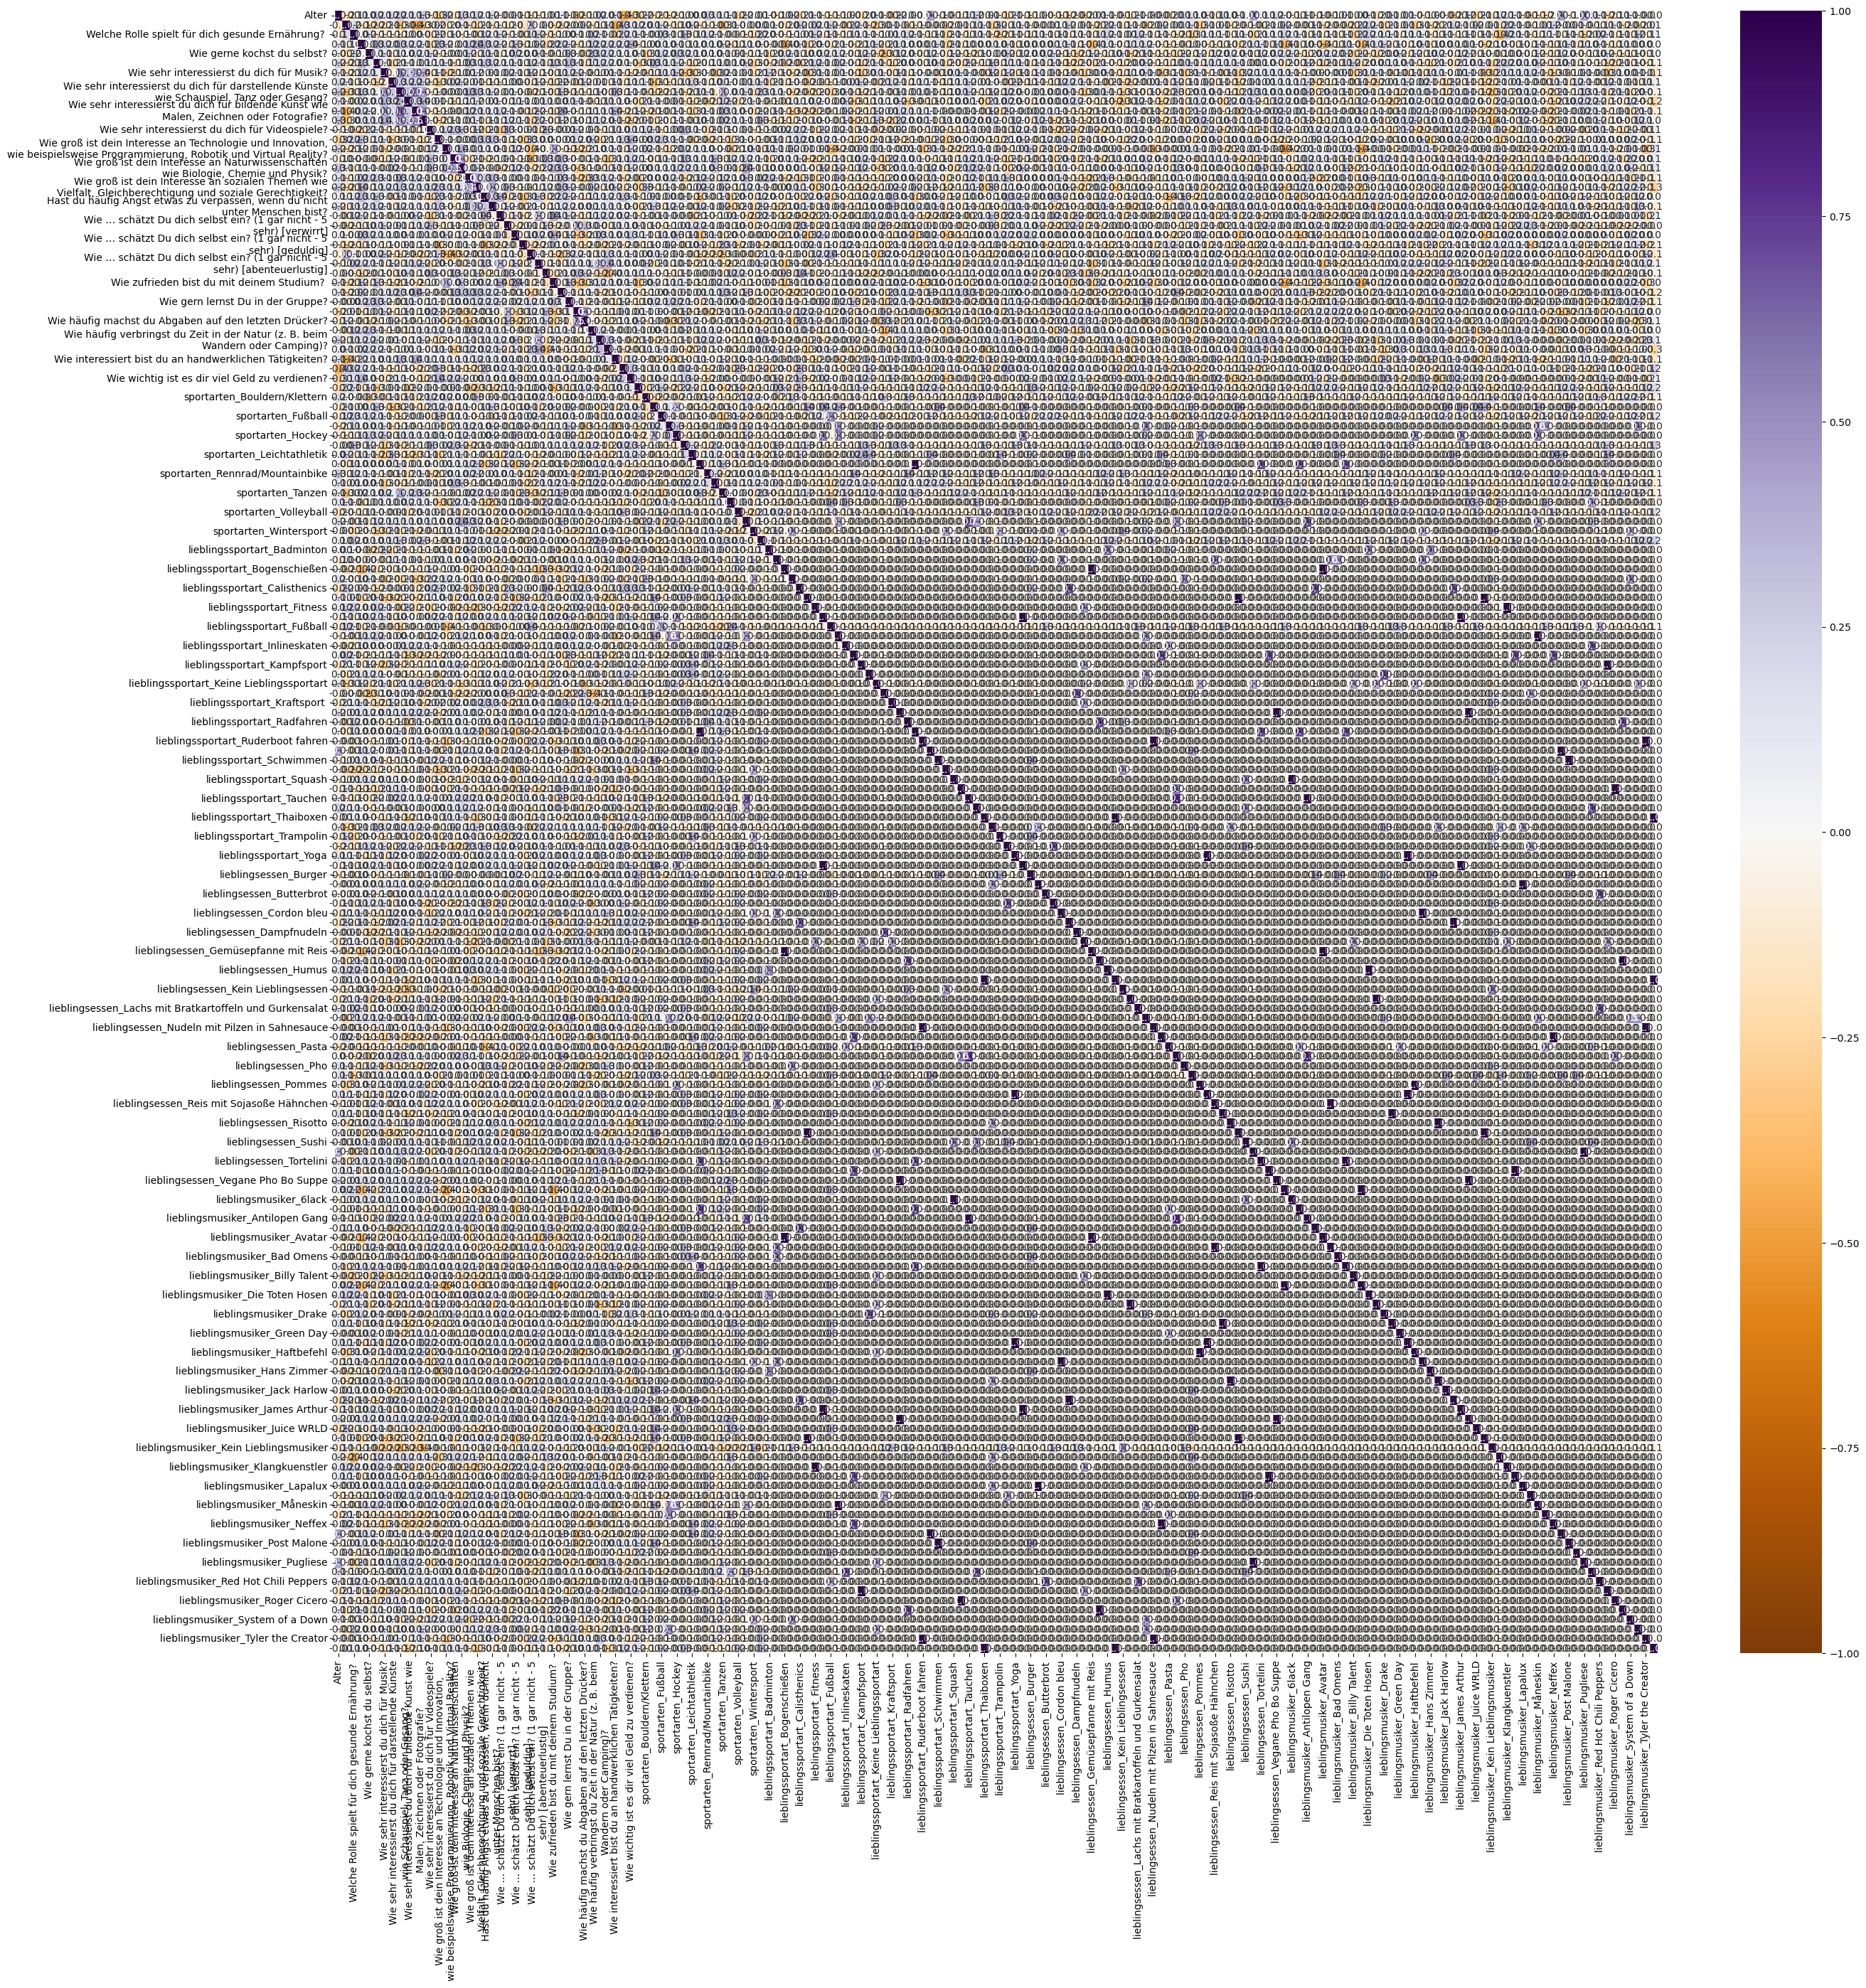

In [149]:
fig, ax = plt.subplots(figsize=(30, 30))

sb.heatmap(data_encoded.corr(numeric_only=True),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

# TODO: Sinnige Pairplots aussuchen statt random #

z. B. welche mit starken Korrelationen

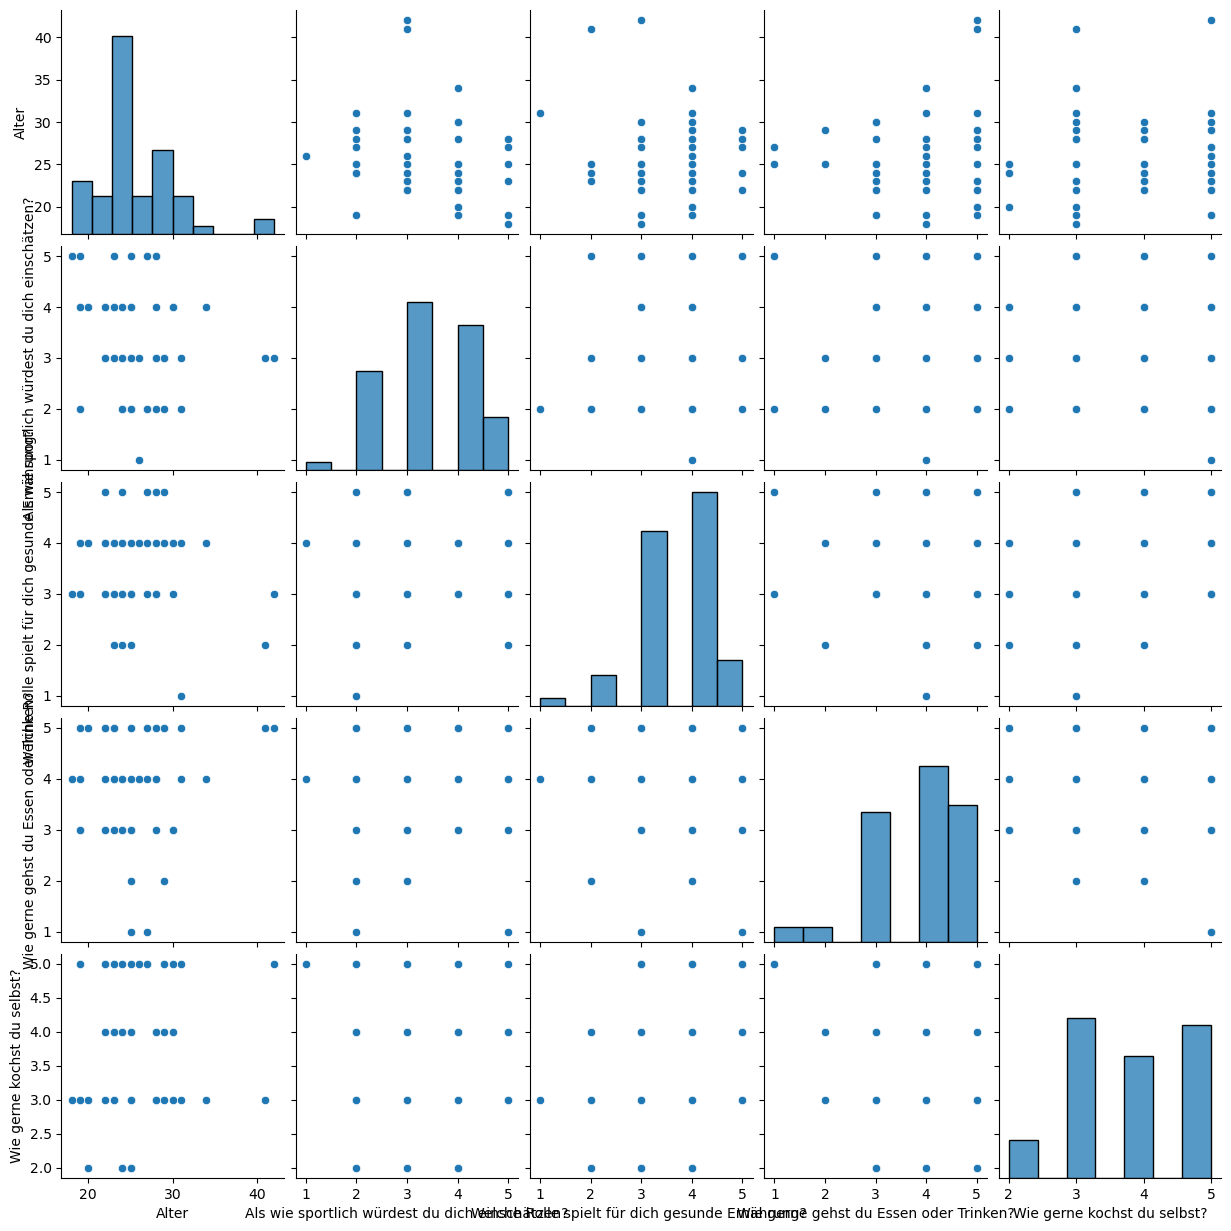

In [150]:
sb.pairplot(data.iloc[:,:10], diag_kind="hist")

# TODO: Welche Features wollen wir (vielleicht) nicht mit einbeziehen? #

Auf jeden Fall das Pseudonym und den Timestamp!

Z. B. das Alter, das Geschlecht, die Funktion an der HSD, den Studiengang?

In [151]:
columns_to_drop = [columns.pseudonym]
data = data.drop(columns_to_drop, axis=1)

data

Alter Geschlecht  \
0      28   männlich   
1      26   männlich   
2      24   männlich   
3      23   männlich   
4      24   weiblich   
..    ...        ...   
57     26   männlich   
58     22   männlich   
59     25   weiblich   
60     31   weiblich   
61     25   männlich   

   Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?  \
0                                          Student*in                  
1                                          Student*in                  
2                                          Student*in                  
3                                          Student*in                  
4                                          Student*in                  
..                                                ...                  
57                                         Student*in                  
58                                         Student*in                  
59                                         Student*in                  
60                                         Student*in                  
61                                         Student*in                  

   Welchem Studiengang fühlst du dich am meisten zugehörig?  \
0                                                 MMI         
1                                                 MMI         
2                                                 MMI         
3                                                 MMI         
4                                                 MMI         
..                                                ...         
57                                                MMI         
58                                                BMT         
59                                                BMT         
60                                                BMI         
61                                                BMT         

    Als wie sportlich würdest du dich einschätzen?  \
0                                                4   
1                                                3   
2                                                2   
3                                                5   
4                                                3   
..                                             ...   
57                                               1   
58                                               3   
59                                               3   
60                                               3   
61                                               2   

   Was ist deine absolute Lieblingssportart?  \
0                                     Joggen   
1                                    Fußball   
2                    Keine Lieblingssportart   
3                                  Trampolin   
4                                   Klettern   
..                                       ...   
57                   Keine Lieblingssportart   
58                                   Fußball   
59                          Ruderboot fahren   
60                              Padel-Tennis   
61                                Ski fahren   

    Welche Rolle spielt für dich gesunde Ernährung?   \
0                                                  4   
1                                                  4   
2                                                  5   
3                                                  2   
4                                                  4   
..                                               ...   
57                                                 4   
58                                                 3   
59                                                 3   
60                                                 4   
61                                                 2   

    Wie gerne gehst du Essen oder Trinken?  Wie gerne kochst du selbst?  \
0                                        3                            4   
1                                        4  